# Time Series decomposition

- **Time series data** is data with a natural temporal ordering.
- **Time series analysis** is a set of techniques and methodologies to extract meaningful information from this inherent natural temporal ordering.
- In contrast **cross sectional data** deals with different entities at the same point in time
- Ask yourself the question: Is there meaningful information in the past observations of the time series that cannot be extracted by any other covarying variable? If the answer to this question is **yes**, that is when time series analysis comes into play.
- This could be the case if we either can't model any other relationship or we cannot access the necessary data.

## Components of Time Series

- Time series data consists of up to 4 components:
    1. Trend
    2. Seasonality
    3. Remainder
        - Time Dependece
        - Randomness
- The component we are most interested in is the **Time Dependence**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def plot(x, y, title):
    '''
    The function plot() is designed to make it easier for me to run this encounter.
    
    -----------
    Parameters:
    x: The values of the x axis
    y: The values of the y axis
    title: The title of the plot
    '''
    plt.figure(figsize=(12, 6))
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('y-values')

### 1) Trend

In [2]:
# We want to have time on the x-axis
x = pd.date_range(start='01-01-2017', end='12-31-2019', freq='D')
x

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=1095, freq='D')

In [4]:
len(x)

1095

In [3]:
# Choose y to be an linearly increasing over time
y = np.linspace(1, len(x), len(x))/30
y

array([3.33333333e-02, 6.66666667e-02, 1.00000000e-01, ...,
       3.64333333e+01, 3.64666667e+01, 3.65000000e+01])

In [6]:
# Combine them into a DataFrame
df = pd.DataFrame({'Date': x, 'y_lin': y})
df.set_index('Date', inplace=True)
df.head()

,y_lin
Date,
2017-01-01,0.033333
2017-01-02,0.066667
2017-01-03,0.100000
2017-01-04,0.133333
2017-01-05,0.166667


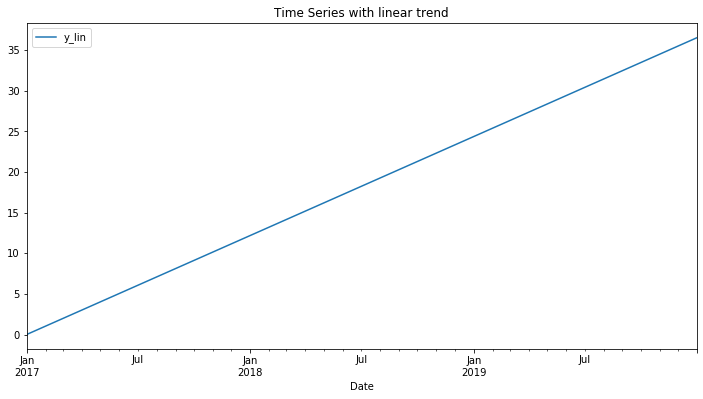

In [7]:
# Look at time series data without a trend
df.plot(figsize=(12,6), title='Time Series with linear trend')

In [8]:
# Look at time series data with an exponential trend
df['y_exp'] = df['y_lin']**2
df.head()

,y_lin,y_exp
Date,,
2017-01-01,0.033333,0.001111
2017-01-02,0.066667,0.004444
2017-01-03,0.100000,0.010000
2017-01-04,0.133333,0.017778
2017-01-05,0.166667,0.027778


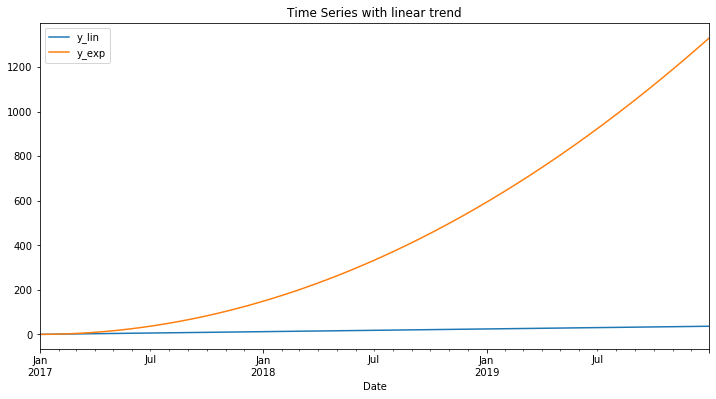

In [9]:
df.plot(figsize=(12,6), title='Time Series with linear trend')

### 2) Seasonality

In [10]:
# Sometimes time series data has a seasonal component
df['y_seasonal'] = np.sin(df['y_lin'])
df.head()

,y_lin,y_exp,y_seasonal
Date,,,
2017-01-01,0.033333,0.001111,0.033327
2017-01-02,0.066667,0.004444,0.066617
2017-01-03,0.100000,0.010000,0.099833
2017-01-04,0.133333,0.017778,0.132939
2017-01-05,0.166667,0.027778,0.165896


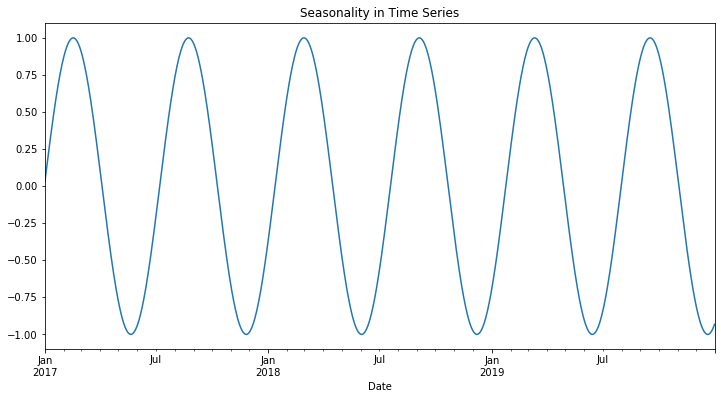

In [12]:
df['y_seasonal'].plot(figsize=(12,6), title='Seasonality in Time Series')

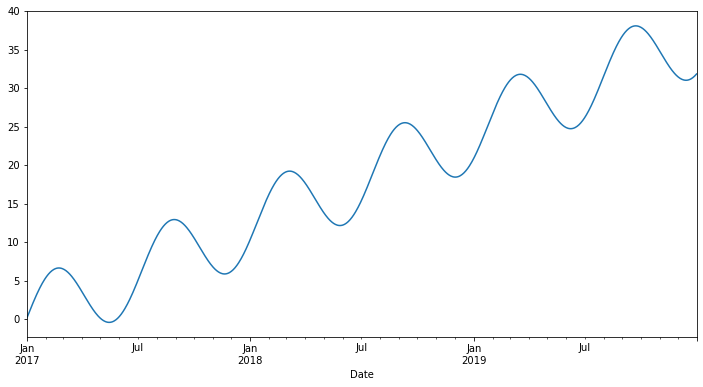

In [14]:
# Combine Trend and seasonality
df['trend_season'] = df['y_lin'] + df['y_seasonal']*5
df['trend_season'].plot(figsize=(12,6))

### 3) Remainder - Time Dependence

Keep in mind, the remainder consists of two components itself:
- Time Dependence
- Randomness

We will first be looking at the Time Dependence part.

#### Extreme Case: Random Walk

$y_{t+1} = y_t + \epsilon_t$

where $\epsilon_t \sim N(0, \sigma^2)$ is an iid random variable with a standard normal distribution.

In [15]:
# Create and plot a random walk with np.cumsum
df['random_walk'] = np.cumsum([np.random.normal() for _ in range(len(df))])
df.head()

,y_lin,y_exp,y_seasonal,trend_season,random_walk
Date,,,,,
2017-01-01,0.033333,0.001111,0.033327,0.199969,0.685956
2017-01-02,0.066667,0.004444,0.066617,0.399753,0.968714
2017-01-03,0.100000,0.010000,0.099833,0.599167,0.435435
2017-01-04,0.133333,0.017778,0.132939,0.798026,0.251357
2017-01-05,0.166667,0.027778,0.165896,0.996147,-0.543454


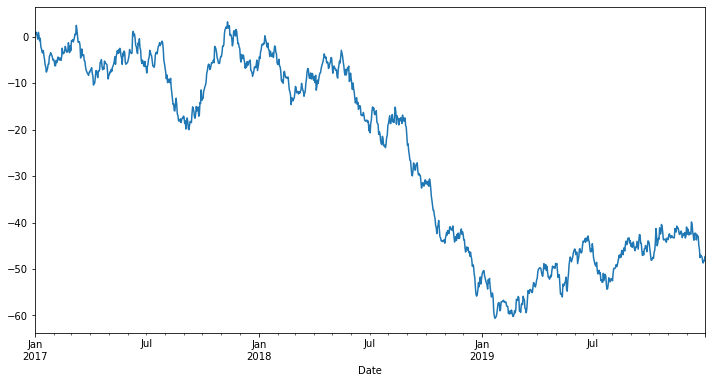

In [16]:
df['random_walk'].plot(figsize=(12,6))

#### Less extreme and more interesting case: Stationary Time Series

For example:

$y_{t+1} = 0.8*y_t + \epsilon_t$

In [61]:
# Create and plot a simple time dependent series
y_0 = np.random.normal()
y_1 = 0.8*y_0 + np.random.normal()
y_stationary = [y_0, y_1]
y_stationary

[-0.19105883981068683, 0.9268120365331904]

In [62]:
for i in range(len(df[:-2])):
    y_stationary.append(0.8*y_stationary[-1] + np.random.normal())

In [63]:
len(y_stationary), len(df)

(1095, 1095)

In [64]:
df['stationary'] = y_stationary

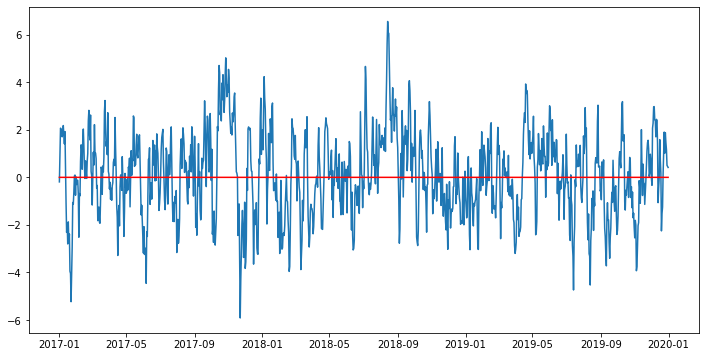

In [66]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['stationary'])
plt.plot(df.index, [0]*len(df), c='r')
#plt.ylim(ymin=-100, ymax=10)

In [36]:
# Check for the mean of the time series data
df.stationary.mean()

-0.055180486896949016

### 4) Randomness

When we talk about randomnes in this context we usually mean **White Noise**

In [37]:
# Create and plot white noise
df['random'] = [np.random.normal() for _ in range(len(df))]
df.head()

,y_lin,y_exp,y_seasonal,trend_season,random_walk,stationary,random
Date,,,,,,,
2017-01-01,0.033333,0.001111,0.033327,0.199969,0.685956,0.152576,0.538134
2017-01-02,0.066667,0.004444,0.066617,0.399753,0.968714,-0.993560,-0.544118
2017-01-03,0.100000,0.010000,0.099833,0.599167,0.435435,-2.011040,0.465382
2017-01-04,0.133333,0.017778,0.132939,0.798026,0.251357,-1.812199,-1.059412
2017-01-05,0.166667,0.027778,0.165896,0.996147,-0.543454,-1.264222,-0.544159


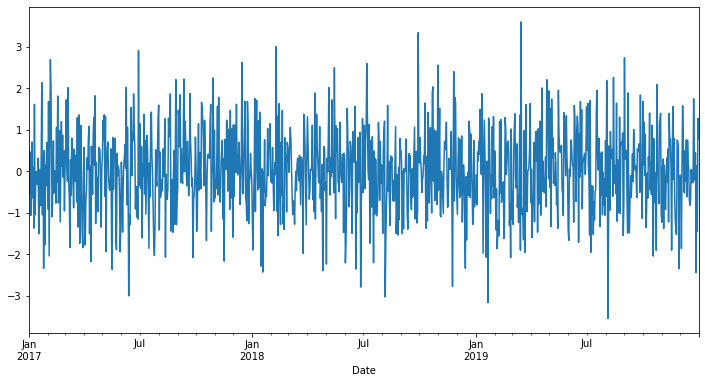

In [38]:
df['random'].plot(figsize=(12,6))

### They can be combined

In [ ]:
# Combine and plot all of the components

In [71]:
df.drop('y_exp', axis=1, inplace=True)

In [73]:
df['time_series'] = df['trend_season'] + df['stationary']

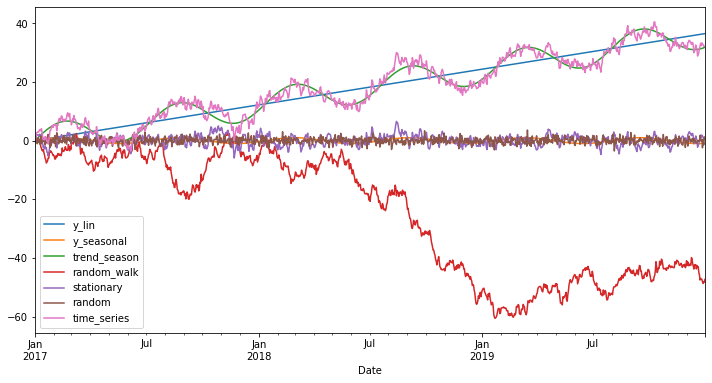

In [74]:
df.plot(figsize=(12,6))